In [1]:
import nbpresent
nbpresent.__version__

'3.0.2'

In [4]:
#pre-req
#Install: Anaconda 4.4.0, Keras 2.0.6, Tensorflow 1.2.1, Python 3.6.1, RISE, NB-CONDA

<h1>Deep Learning Workshop - JULY 2017</h1>
<br>
<a href="http://home.cse.shirazu.ac.ir/~m.valipour/">Mojtaba Valipour</a> @ Shiraz University

<h5>Session 8 (Code Session) </h5>
<p><strong><span class="a"></span></strong> <span class="b"></span> <span></span></p>

<div style="width: 200px; float:right;margin:0 10px 10px 0" markdown="1">
![tfImage](elements/images/kerasLogo.png)
</div>

<img src="elements/images/phd-2.jpg" alt="Drawing" align="middle" style="width: 950px;"/>

Download Contents of Workshop Here:
https://github.com/mvpcom/ShirazuDL

What is AutoEncoder? 
<div style="width: 1200px; float:right;margin:0 10px 10px 0" markdown="1">
![tfImage](elements/images/01AE/Autoencoder.png)
</div>

Reference: https://github.com/udacity/deep-learning/blob/master/autoencoder/Simple_Autoencoder_Solution.ipynb

General structure of an AE: 
<div style="width: 1200px; float:center;" markdown="1">
![tfImage](elements/images/01AE/generalAE.jpg)
</div>

Reference: http://www.deeplearningbook.org/contents/autoencoders.html

<!---Latex Code-->
$ R = g(h) $

$ h = f(X) $

Why AutoEncoders?
    1. Many Algorithms works well only in Low Dimensional Cases
    2. Huge effortes need to provide annotated examples

If an autoencoder succeeds in simply learning to set $ g(f(X)) = X $ It's not especially useful 

Autoencoders:
* Undercomplete AutoEncoder
* Regularized AutoEncoder
* Sparse AutoEncoder
* Denosoising AutoEncoder
* Variational AutoEncoder
* Seq2Seq AutoEncoder
* etc. 

An autoencoder whose code dimension is less than the input dimension is called undercomplete

<img src="elements/images/01AE/undercomplete.png" alt="Drawing" align="middle" style="width: 1200px;"/>

Rather than limiting the model capacity by keeping the encoder and decoder shallow and the code size small, regularized autoencoders use a loss function that encourages the model to have other properties besides the ability to copy its input to its output.

A sparse autoencoder is simply an autoencoder whose training criterion involves a sparsity penalty

Reference: https://github.com/udacity/deep-learning/blob/master/autoencoder/Simple_Autoencoder_Solution.ipynb

Applications: 
    * Data Denoising
    * Dimensionality Reduction
    * Feature Learning
    * Stack Learning

In [1]:
#Helper Functions
# find factors automatically
def factorsFind(num, prefer=None):
    if prefer is not None:
        bestDivider = prefer
        return bestDivider, int(num/bestDivider)
    bestDivider = 1
    for i in range(2,int(num/2)):
        if num%i == 0:
            bestDivider = i
    return bestDivider, int(num/bestDivider)

def plotSpecialTool(data,labels,samples2Visualize=12,factors=[2,6], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=[]):
    # samples2Visualize = 12 # sample 12 random number
    # factors = [2,6] # indicate two factors for number of samples
    assert np.prod(np.array(factors))==samples2Visualize, "%rx%r is not equal to %r" % (factors[0],factors[1],samples2Visualize)
    figure = plt.figure(figsize=figsize)
    nLimit = data.shape[0]
    for i in range(1,samples2Visualize+1):
        img = figure.add_subplot(factors[0],factors[1],i)
        # randomly sample an image from train set
        
        if len(indexes) != 0:
            imgID = indexes[i-1]
        else: 
            imgID = np.random.randint(nLimit-1)
            
        image = data[imgID]
        image = image * 255.
        
        if len(reshaper) != 0:
            image = image.reshape(reshaper[0], reshaper[1])
            
        if grayFlag:
            plt.imshow(image.reshape(image.shape[0],image.shape[1]), cmap=plt.get_cmap('gray'))
        else:
            plt.imshow(image+thr)
            
        if len(labels) != 0:
            img.set_title(labels[imgID],fontsize=7)
            
        plt.axis('off')

## Undercomplete AutoEncoder:

First AutoEncoder Example:
<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 900px;"/>

In [2]:
# ~/.keras/dataset
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

Using TensorFlow backend.


(60000, 784)
(10000, 784)


In [5]:
# Step 1: Import Libraries
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

In [6]:
encodingDim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 1000px;"/>

In [7]:
# this is our input placeholder
inputImg = Input(shape=(784,))

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 1000px;"/>

In [18]:
# "encoded" is the encoded representation of the input
encoded = Dense(encodingDim, activation='relu')(inputImg)

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 1000px;"/>

In [19]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 1000px;"/>

In [20]:
# this model maps an input to its reconstruction
autoencoder = Model(inputImg, decoded)

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 1000px;"/>

In [21]:
# this model maps an input to its encoded representation
encoder = Model(inputImg, encoded)

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 1000px;"/>

In [22]:
# create a placeholder for an encoded (32-dimensional) input
encodedInput = Input(shape=(encodingDim,))

In [23]:
# retrieve the last layer of the autoencoder model
decoderLayer = autoencoder.layers[-1]

In [24]:
# create the decoder model
decoder = Model(encodedInput, decoderLayer(encodedInput))

<img src="elements/images/01AE/autoencoder_1.png" alt="Drawing" align="middle" style="width: 850px;"/>

In [25]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [16]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s - loss: 0.3804 - val_loss: 0.2740
Epoch 2/50
60000/60000 [==============================] - 5s - loss: 0.2681 - val_loss: 0.2592
Epoch 3/50
60000/60000 [==============================] - 5s - loss: 0.2498 - val_loss: 0.2373
Epoch 4/50
60000/60000 [==============================] - 5s - loss: 0.2296 - val_loss: 0.2192
Epoch 5/50
60000/60000 [==============================] - 5s - loss: 0.2143 - val_loss: 0.2063
Epoch 6/50
60000/60000 [==============================] - 5s - loss: 0.2029 - val_loss: 0.1963
Epoch 7/50
60000/60000 [==============================] - 5s - loss: 0.1937 - val_loss: 0.1880TA: 2s - los - ETA: 1s - loss: - ETA: 
Epoch 8/50
60000/60000 [==============================] - 5s - loss: 0.1862 - val_loss: 0.1813
Epoch 9/50
60000/60000 [==============================] - 5s - loss: 0.1799 - val_loss: 0.1755
Epoch 10/50
60000/60000 [==============================] 

In [26]:
# ignore training for now, just load the model
from keras.models import load_model
autoencoder = load_model('simpleAE.h5')

In [19]:
# save models and weights
autoencoder.save('simpleAE.h5')

In [27]:
# encode and decode some digits
# note that we take them from the *test* set
encodedImgs = encoder.predict(x_test)
decodedImgs = decoder.predict(encodedImgs)

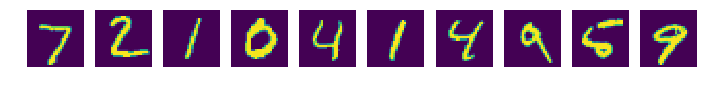

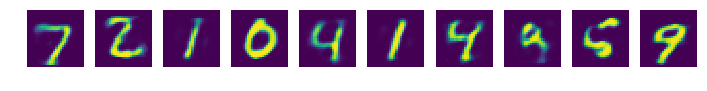

In [18]:
allIdx = range(10)
plotSpecialTool(x_test,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plotSpecialTool(decodedImgs,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plt.show()

In [27]:
del autoencoder

## Sparse AutoEncoder:

In [20]:
# add a Dense layer with a L1 activity regularizer
from keras import regularizers
encoded = Dense(encodingDim, activation='relu',
                activity_regularizer=regularizers.l1(10e-8))(inputImg)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(inputImg, decoded)

In [21]:
autoencoder = Model(inputImg, decoded)

In [22]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [24]:
# ignore training for now, just load the model
from keras.models import load_model
autoencoder = load_model('sparseAE.h5')

In [44]:
# save models and weights
autoencoder.save('sparseAE.h5')

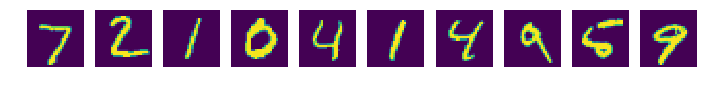

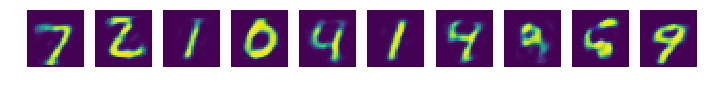

In [25]:
decodedImgs = autoencoder.predict(x_test)
allIdx = range(10)
plotSpecialTool(x_test,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plotSpecialTool(decodedImgs,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plt.show()

## Deep AutoEncoder:

In [26]:
# easily extendible to deep
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)

In [27]:
encoded = Dense(64, activation='relu')(encoded)

In [28]:
encoded = Dense(32, activation='relu')(encoded)

In [29]:
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [31]:
# ignore training for now, just load the model
from keras.models import load_model
autoencoder = load_model('deepAE.h5')

In [35]:
# save models and weights
autoencoder.save('deepAE.h5')

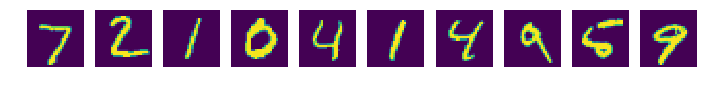

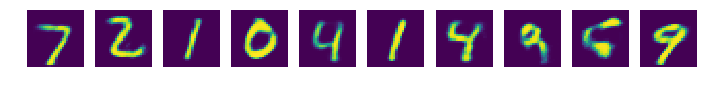

In [32]:
decodedImgs = autoencoder.predict(x_test)
allIdx = range(10)
plotSpecialTool(x_test,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plotSpecialTool(decodedImgs,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plt.show()

Encoder and and decoder steps can be fully connected, convolutional, recurrent, etc.

<div style="width: 1000px; float:right;margin:0 10px 10px 0" markdown="1">
![tfImage](elements/images/01AE/Autoencoder.png)
</div>

## Convolutional AutoEncoder

In [28]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [29]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

In [30]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)

In [31]:
x = MaxPooling2D((2, 2), padding='same')(x)

In [32]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

In [33]:
x = MaxPooling2D((2, 2), padding='same')(x)

In [34]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

In [35]:
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [36]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)

In [37]:
x = UpSampling2D((2, 2))(x)

In [38]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

In [39]:
x = UpSampling2D((2, 2))(x)

In [40]:
x = Conv2D(16, (3, 3), activation='relu')(x)

In [41]:
x = UpSampling2D((2, 2))(x)

In [42]:
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [43]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# run tensorboard in your command line
tensorboard --logdir=/tmp/autoencoder

In [45]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 168s - loss: 0.1368 - val_loss: 0.1305
Epoch 2/5
60000/60000 [==============================] - 13815s - loss: 0.1314 - val_loss: 0.1280
Epoch 3/5
60000/60000 [==============================] - 200s - loss: 0.1271 - val_loss: 0.1230
Epoch 4/5
60000/60000 [==============================] - 209s - loss: 0.1240 - val_loss: 0.1242
Epoch 5/5
60000/60000 [==============================] - 192s - loss: 0.1217 - val_loss: 0.1191


In [49]:
# ignore training for now, just load the model
from keras.models import load_model
autoencoder = load_model('convAE.h5')

In [60]:
# save models and weights
autoencoder.save('convAE.h5')

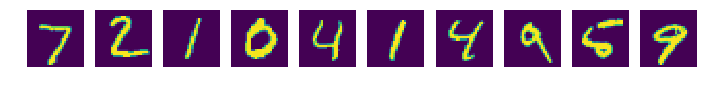

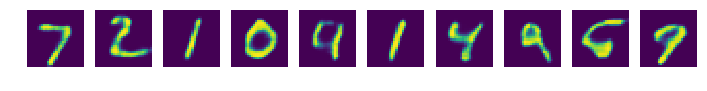

In [50]:
decodedImgs = autoencoder.predict(x_test)
allIdx = range(10)
plotSpecialTool(x_test,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plotSpecialTool(decodedImgs,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plt.show()

## Denoising AutoEncoder

In [51]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [52]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

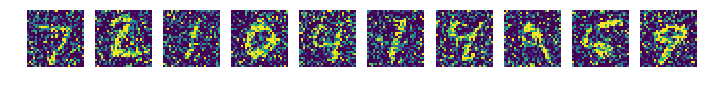

In [53]:
plotSpecialTool(x_test_noisy,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plt.show()

In [61]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

In [62]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)

In [63]:
x = MaxPooling2D((2, 2), padding='same')(x)

In [64]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

In [65]:
# at this point the representation is (7, 7, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

In [66]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [67]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [70]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 452s - loss: 0.1872 - val_loss: 0.1329
Epoch 2/5
60000/60000 [==============================] - 463s - loss: 0.1245 - val_loss: 0.1152
Epoch 3/5
60000/60000 [==============================] - 471s - loss: 0.1151 - val_loss: 0.1120
Epoch 4/5
60000/60000 [==============================] - 465s - loss: 0.1109 - val_loss: 0.1075
Epoch 5/5
60000/60000 [==============================] - 475s - loss: 0.1083 - val_loss: 0.1069


In [68]:
# ignore training for now, just load the model
from keras.models import load_model
autoencoder = load_model('denoiseAE.h5')

In [71]:
# save models and weights
autoencoder.save('denoiseAE.h5')

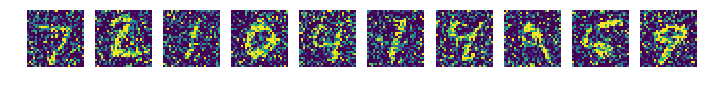

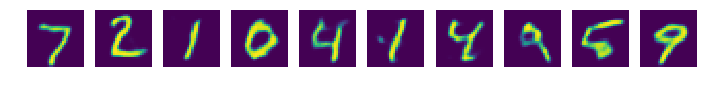

In [69]:
decodedImgs = autoencoder.predict(x_test_noisy)
allIdx = range(10)
plotSpecialTool(x_test_noisy,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plotSpecialTool(decodedImgs,[],samples2Visualize=10,factors=[1,10], figsize=(12,3), grayFlag=False, thr=0.0, reshaper=(28,28), indexes=allIdx)
plt.show()

References:
    1. https://blog.keras.io/building-autoencoders-in-keras.html
    2. http://www.birving.com/presentations/autoencoders/index.html
    3. http://www.deeplearningbook.org/contents/autoencoders.html
    4. https://github.com/fchollet/keras/blob/master/examples/imdb_cnn_lstm.py